# 1o Trabalho de PSD (notebook para preencher com os resultados)

### Número do Grupo : `10`

`André Silveira Sousa		RA: 628239`

`Vinicius Gonçalves Arruda	RA: 744355`

In [ ]:
!pip install scikit-dsp-comm
import sk_dsp_comm.sigsys as ss

import numpy as np
from matplotlib import pylab
from pylab import *

import scipy.signal as signal
from IPython.display import Audio, display
from IPython.display import Image, SVG

     |████████████████████████████████| 90 kB 3.7 MB/s 


In [ ]:
pylab.rcParams['savefig.dpi'] = 100 # default 72
#pylab.rcParams['figure.figsize'] = (6.0, 4.0) # default (6,4)
#%config InlineBackend.figure_formats=['png'] # default for inline viewing
#config InlineBackend.figure_formats=['svg'] # SVG inline viewing
%config InlineBackend.figure_formats=['pdf'] # render pdf figs for LaTeX

# Problema 1
 Usando a função stem() em Python calcule e plote as seguintes funções
$$
\begin{align}
    x_1[n] &= \sin\big(\frac{\pi}{5}n\big),\ 0\leq n \leq 15 \\
    x_2[n] &= \cos\big(\frac{3\pi}{5}n\big),\ 0\leq n \leq 15 \\
    x_3[n] &= \sin\big(\frac{\pi}{4}n\big)\cos\big(\frac{\pi}{4}n\big),\ 0\leq n \leq 32
\end{align}
$$
Qual é o período da fundamental de cada sinal?

## Parte a - sinal $x_1[n]$
O período da fundamental, $N$, é 10

`Verificado através da fórmula e da observação da repetição no gráfico`

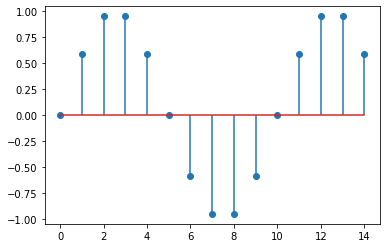

In [139]:
# Definição do sinal
# obs: n é onde esta definido { 0 <= n <= 15 }

n = np.arange(0,15)
x1 = np.sin((np.pi/5) * n)

# Plotando o gráfico de x1[n]

plt.stem(n, x1, use_line_collection=True)
plt.show()


## Parte b - sinal $x_2[n]$
O período da fundamental, $N$, é 10

`Verificado através da fórmula e da observação da repetição no gráfico`

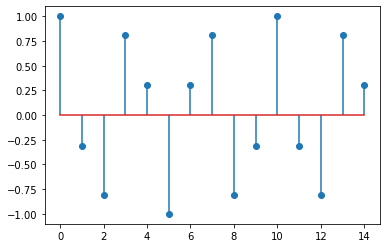

In [140]:
# Definição do sinal

n = np.arange(0,15)
x2 = np.cos((3 * np.pi/5) * n)

# Plotando o gráfico de x2[n]

plt.stem(n, x2, use_line_collection=True)
plt.show()


## Parte c - sinal $x_3[n]$
Para encontrar o período, primeiro expanda o produto usando uma relação trigonomêtrica apropriada:
$$
    x_3[n] = \frac{1}{2}\left[\sin(0\cdot n) + \sin\big(\frac{\pi}{2}n\big)\right], 0\leq n\leq 32
$$
Você deve escolher $N$ tal que $\ldots$

`A partir da observação do gráfico, a função se repete com N=4`


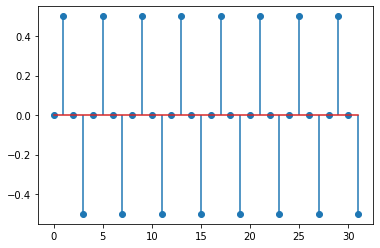

In [ ]:
# Definição do sinal

n = np.arange(0,32)
x3 = np.sin((np.pi/4) * n) * np.cos((np.pi/4) * n)

# Plotando o gráfico de x3[n]

plt.stem(n, x3, use_line_collection=True)
plt.show()


# Problema 2
Usando a função `stem()` calcule e plote o sinal
$$
x[n] = \begin{cases}
        2n+1, & -3\leq n\leq 3 \\
        0, & \text{otherwise}
        \end{cases}
$$
no intervalo $-8\leq n\leq 8$. 

OBS: Criar a função $x[n]$ sem o uso de loop!! Observe ainda que o módulo python “sk_dsp_comm.sigsys” possui a função drect() que serve para criar uma função janela - estude o exemplo python ex2.py fornecido na aba “Material para realização dos projetos”. 

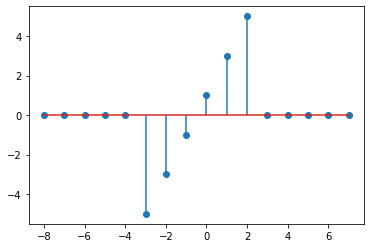

In [ ]:
# A função drect cria uma função retângulo discreta de N amostras
# Dentro do retângulo a função se comporta de um jeito, e fora do retângulo é tudo zero

# Descrição do sinal

n = np.arange(-8,8)
x = (2*n + 1) * ss.drect(n+3, N = 6)

# Parametros do drect: 
# n+3 é o deslocamento de n (para o comportamento do x[n] começar em n=-3)
# N que é a quantidade de pontos n que está contida no retângulo
# o valor que multiplica drect é o comportamento da função dentro do retângulo

# Plotando o gráfico

plt.stem(n, x, use_line_collection=True)
plt.show()


# Problema 3
Usando a função `stem()` calcule e plote o sinal
$$
    x[n] = u[n]u[8-n] + u[n-2]-u[n-5]
$$
no intervalo $-2\leq n\leq 16$.  Observe que o módulo  `sigsys`  (aliased  como  `ss`)  possui a função `dstep()` definida, a qual pode tornar esse problema bastante simples.

OBS: Estude os exemplos ex1.py e ex2.py fornecidos na aba “Material para realização dos projetos”.

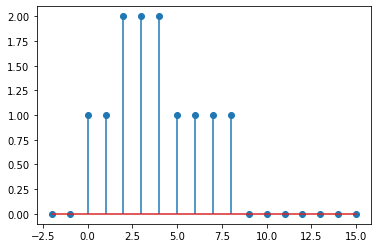

In [ ]:
# Nesse exercicio foi proposto usar a função "dstep", que é a função u[n]
# Dessa forma é possível descrever o sinal exatamente da forma que está dada

# Descrição do sinal:

n = np.arange(-2,16)
x = (ss.dstep(n) * ss.dstep(8-n) + ss.dstep(n-2) - ss.dstep(n-5))

# Plotando o gráfico

plt.stem(n, x, use_line_collection=True)
plt.show()

# Problema 4
Considere o sinal
$$
    y[n] = \begin{cases}
        2, & n=0 \\
        1, & n=1 \\
        -1, & n=3 \\
        3, & n=4 \\
        0, & \text{caso contrário}
    \end{cases}
$$

Escreva uma função python ($y[n]$) como indicado abaixo para que você possa responder as questões que seguem.

In [ ]:
# Nesse exercicio foi proposto usar a função "dimpulse", que é a função delta (impulso)
# Portanto é necessário descrever o sinal y por funções delta, como segue:
# y[n] = 2*delta[n] + 1*delta[n-1] - 1*delta[n-3] + 3*delta[n-4]

# teste: defini um conjunto de n pra ver se a função tava funcionando
n = np.arange(-1,6) 

# Definindo y como função para que as outras células possam acessar:

def y(n):

  yy = (2 * ss.dimpulse(n) + ss.dimpulse(n-1) - ss.dimpulse(n-3) + 3 * ss.dimpulse(n-4))
  return yy

# teste: printei o y no conjunto n pra checar se tava gerando a função certinho
print(y(n))

[ 0.  2.  1.  0. -1.  3.  0.]


## Parte a
Usando a função `stem()` plote $z_1[n] = y[n-2]$.

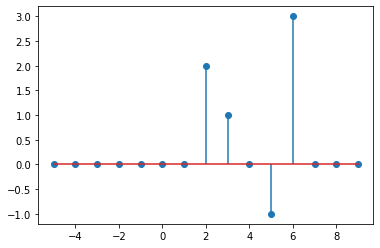

In [ ]:
# Definindo o sinal

n = np.arange(-5,10)
z1 = y(n-2)

# Plotando no gráfico

plt.stem(n, z1, use_line_collection=True)
plt.show()

## Parte b
Usando a função `stem()` plote $z_2[n] = y[n+2]$.

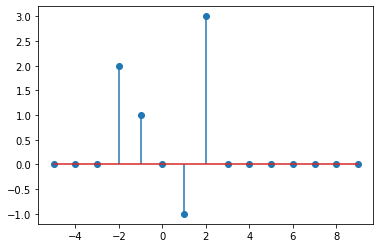

In [ ]:
# Definindo o sinal

n = np.arange(-5,10)
z2 = y(n+2)

# Plotando no gráfico

plt.stem(n, z2, use_line_collection=True)
plt.show()

# Da pra ver que esse é o z1 deslocado

## Parte c
Usando a função `stem()` plote $z_3[n] = y[-n]$.

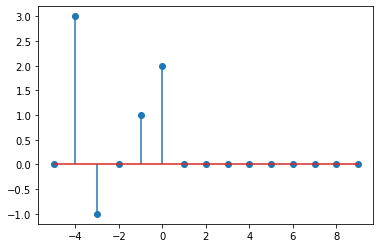

In [ ]:
# Definindo o sinal

n = np.arange(-5,10)
z3 = y(-n)

# Plotando no gráfico

plt.stem(n, z3, use_line_collection=True)
plt.show()

# Da pra ver que esse é o y espelhado nos valores negativos de n

# Problema 5
Dado os sinais abaixo:
$$
\begin{align}
    x_1[n] &= \{1,2,-3,2,1,1\} \;\;\;\; h_1[n] = \{1,2,-3\}\\
    x_2[n] &= \{0,0,0,0,1,1,1,1,0,0,0,0,-1,-1,-1,-1,0,0,0,0\}$  \;\;\;\;  h_{2}[n]=\{1,4,10,16,19,16,10,4,1\}
\end{align}
$$

## Parte a
Escrever uma função na linguagem python (__"sem usar funções prontas de qualquer biblioteca"__) para fazer a __convolução__ entre dois sinais unidimensionais (1D). 

In [141]:
# Função SOMA DE CONVOLUÇÃO

def conv(x,h):

  # definindo o formato da resposta::
  # cria um vetor resposta y com valores zero
  # o tamanho de y é o tamanho do vetor x + o tamanho do vetor h - 1 (definição)

  len_y = len(x) + len(h)-1
  y = np.zeros((len_y,) , dtype=int )

  # preenchendo o vetor y com as somas das multiplicações para cada i (índice que percorre o vetor x) e j (índice que percorre o vetor h)

  for i in range(len(x)):
      for j in range(len(h)):
          y[i+j] += x[i] * h[j] 
          # OBS: a atribuição += vai somando com os valores que já estão em y, por isso é importante já começar com ele zerado

  return y


## Parte b
Faça a convolução entre os sinais $x_1*h_1$ e $x_2*h_2$ e plote usando a função stem os sinais originais e os resultados das convoluções.

***************
EXEMPLO 1:
***************
Entradas: x1 =  [ 1  2 -3  2  1  1]


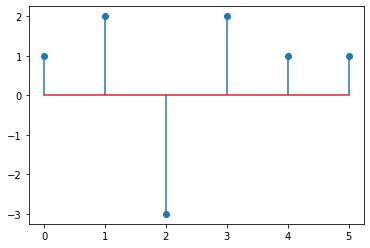

Entradas: h1 =  [ 1  2 -3]


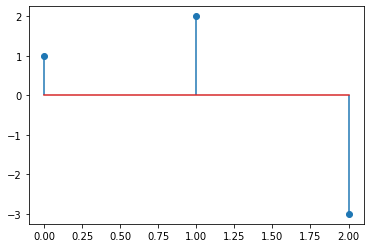

Saída: x1 * h1 =  [  1   4  -2 -10  14  -3  -1  -3]


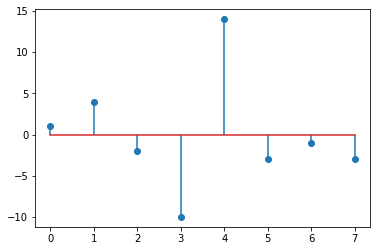

***************
EXEMPLO 2:
***************
Entradas: x2 =  [ 0  0  0  0  1  1  1  1  0  0  0  0 -1 -1 -1 -1  0  0  0  0]


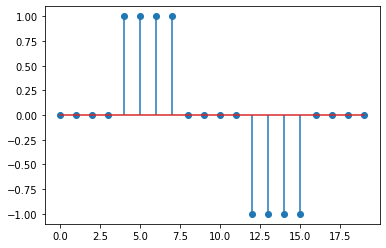

Entradas: h2 =  [ 1  4 10 16 19 16 10  4  1]


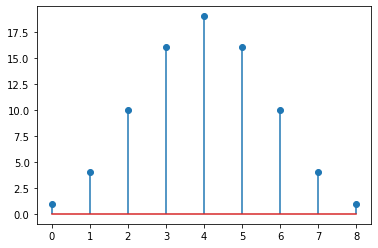

Saída: x2 * h2 =  [  0   0   0   0   1   5  15  31  49  61  61  49  30  10 -10 -30 -49 -61
 -61 -49 -31 -15  -5  -1   0   0   0   0]


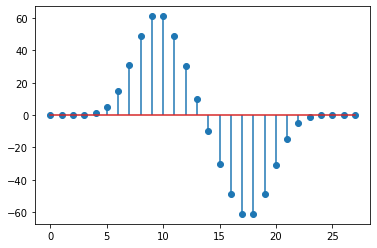

In [136]:
# Definição dos sinais
x1 = np.array([1, 2, -3, 2, 1, 1])
h1 = np.array([1, 2, -3])

x2 = np.array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, -1, -1, -1, -1, 0, 0, 0, 0])
h2 = np.array([1, 4, 10, 16, 19, 16, 10, 4, 1])

y1 = conv(x1,h1)
y2 = conv(x2, h2)

# Impressao: EXEMPLO 1

print("***************")
print("EXEMPLO 1:")
print("***************")


print("Entradas: x1 = ", x1)
len_x1 = np.arange(0, len(x1))
plt.stem(len_x1, x1, use_line_collection=True)
plt.show()

print("Entradas: h1 = ", h1)
len_h1 = np.arange(0, len(h1))
plt.stem(len_h1, h1, use_line_collection=True)
plt.show()

print("Saída: x1 * h1 = ", y1)
#y1 = np.convolve(x1,h1)
#print("Saída com numpy: ", y1)
len_y1 = np.arange(0, len(y1))
plt.stem(len_y1, y1, use_line_collection=True)
plt.show()

# Impressao: EXEMPLO 2

print("***************")
print("EXEMPLO 2:")
print("***************")


print("Entradas: x2 = ", x2)
len_x2 = np.arange(0, len(x2))
plt.stem(len_x2, x2, use_line_collection=True)
plt.show()

print("Entradas: h2 = ", h2)
len_h2 = np.arange(0, len(h2))
plt.stem(len_h2, h2, use_line_collection=True)
plt.show()

print("Saída: x2 * h2 = ", y2)
#y2 = np.convolve(x2,h2)
#print("Saída com numpy: ", y2)
len_y2 = np.arange(0, len(y2))
plt.stem(len_y2, y2, use_line_collection=True)
plt.show()

## Parte c
De maneira similar à "Parte b" do exercício, usando __o mesmo código da função convolução__, faça a __correlação__ entre os sinais e plote os resultados.

Dica, lembre-se que:

Convolução: $ y[n] = \sum_{k=-\infty}^{\infty} x[k]h[n-k]$

Correlação: $ y[n] = \sum_{k=-\infty}^{\infty} x[k]h[n+k]$

***************
EXEMPLO 1:
***************
Entradas: x1 =  [ 1  2 -3  2  1  1]


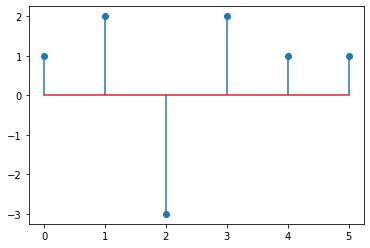

Entradas: h1 =  [ 1  2 -3]


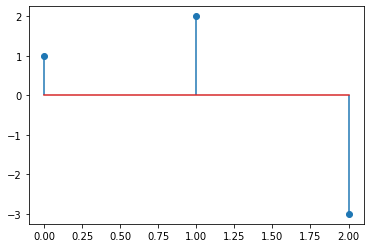

Saída: x1 * h1 =  [ 14 -10  -2   1]
Saída com numpy:  [ 14 -10  -2   1]


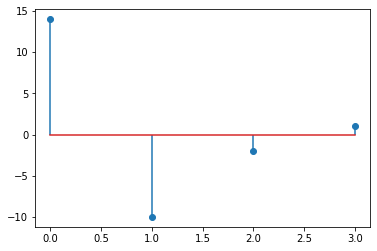

***************
EXEMPLO 2:
***************
Entradas: x2 =  [ 0  0  0  0  1  1  1  1  0  0  0  0 -1 -1 -1 -1  0  0  0  0]


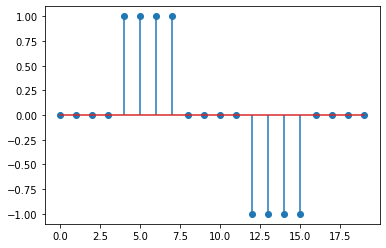

Entradas: h2 =  [ 1  4 10 16 19 16 10  4  1]


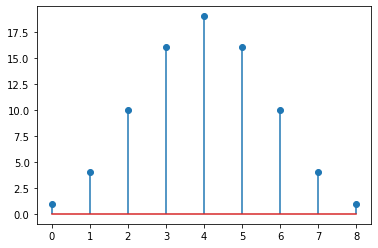

Saída: x2 * h2 =  [ 49  61  61  49  30  10 -10 -30 -49 -61 -61 -49]
Saída com numpy:  [ 49  61  61  49  30  10 -10 -30 -49 -61 -61 -49]


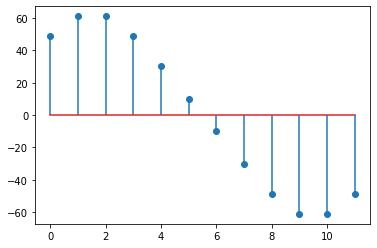

In [135]:
# Função CORRELAÇÃO

def correlacao(x,h):

  # definindo o formato da resposta (cria um vetor zerado)
  # OBS: OBSERVANDO a partir da função NUMPY.CORRELATE que o tamanho de Y é diferente do calculado na correlação
  # Por conta disso toda a lógica usada pelo grupo teve que ser alterada para que as contas saiam certo

  len_y = len(x) - len(h)+1
  y = np.zeros((len_y,) , dtype=int )

  # a lógica para realizar essa execução surgiu da observação do comportamento do resultado
  # cada posição do vetor de saída corresponde a multiplicação de todos os valores de x pelos h indicados

  for i in range(len_y):
      for j in range(len(h)):
          y[i] += x[i+j] * h[j]

  return y
   

# Definição dos sinais

x1 = np.array([1, 2, -3, 2, 1, 1])
h1 = np.array([1, 2, -3])

x2 = np.array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, -1, -1, -1, -1, 0, 0, 0, 0])
h2 = np.array([1, 4, 10, 16, 19, 16, 10, 4, 1])

y1 = correlacao(x1,h1)
y2 = correlacao(x2, h2)

# Impressao: EXEMPLO 1

print("***************")
print("EXEMPLO 1:")
print("***************")


print("Entradas: x1 = ", x1)
len_x1 = np.arange(0, len(x1))
plt.stem(len_x1, x1, use_line_collection=True)
plt.show()

print("Entradas: h1 = ", h1)
len_h1 = np.arange(0, len(h1))
plt.stem(len_h1, h1, use_line_collection=True)
plt.show()

print("Saída: x1 * h1 = ", y1)
y1 = np.correlate(x1,h1)
print("Saída com numpy: ", y1)
len_y1 = np.arange(0, len(y1))
plt.stem(len_y1, y1, use_line_collection=True)
plt.show()

# Impressao: EXEMPLO 2

print("***************")
print("EXEMPLO 2:")
print("***************")


print("Entradas: x2 = ", x2)
len_x2 = np.arange(0, len(x2))
plt.stem(len_x2, x2, use_line_collection=True)
plt.show()

print("Entradas: h2 = ", h2)
len_h2 = np.arange(0, len(h2))
plt.stem(len_h2, h2, use_line_collection=True)
plt.show()

print("Saída: x2 * h2 = ", y2)
y2 = np.correlate(x2,h2)
print("Saída com numpy: ", y2)
len_y2 = np.arange(0, len(y2))
plt.stem(len_y2, y2, use_line_collection=True)
plt.show()

## Parte d
Utilize agora a função da biblioteca numpy (numpy.convolve) para realizar as mesmas convoluções da "Parte a". Use a função numpy.convolve - mode{‘full’} e discuta os resultados.

In [137]:
# Definição dos sinais

x1 = np.array([1, 2, -3, 2, 1, 1])
h1 = np.array([1, 2, -3])

x2 = np.array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, -1, -1, -1, -1, 0, 0, 0, 0])
h2 = np.array([1, 4, 10, 16, 19, 16, 10, 4, 1])

y1 = conv(x1,h1)
y2 = conv(x2, h2)

# Impressao: EXEMPLO 1

print("***************")
print("EXEMPLO 1:")
print("***************")

print("Entradas:")
print("x1 = ", x1)
print("h1 = ", h1)
print("Saída com a função convolução: ", y1)
y1 = np.convolve(x1,h1, mode='full')
print("Saída com numpy convolve: ", y1)


# Impressao: EXEMPLO 2

print("***************")
print("EXEMPLO 2:")
print("***************")

print("Entradas:")
print("x2 = ", x2)
print("h2 = ", h2)
print("Saída com a função convolução: ", y2)
y2 = np.convolve(x2,h2, mode='full')
print("Saída com numpy convolve: ", y2)


***************
EXEMPLO 1:
***************
Entradas:
x1 =  [ 1  2 -3  2  1  1]
h1 =  [ 1  2 -3]
Saída com a função convolução:  [  1   4  -2 -10  14  -3  -1  -3]
Saída com numpy convolve:  [  1   4  -2 -10  14  -3  -1  -3]
***************
EXEMPLO 2:
***************
Entradas:
x2 =  [ 0  0  0  0  1  1  1  1  0  0  0  0 -1 -1 -1 -1  0  0  0  0]
h2 =  [ 1  4 10 16 19 16 10  4  1]
Saída com a função convolução:  [  0   0   0   0   1   5  15  31  49  61  61  49  30  10 -10 -30 -49 -61
 -61 -49 -31 -15  -5  -1   0   0   0   0]
Saída com numpy convolve:  [  0   0   0   0   1   5  15  31  49  61  61  49  30  10 -10 -30 -49 -61
 -61 -49 -31 -15  -5  -1   0   0   0   0]
